In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np

# 加载数据
data = pd.read_csv('temperature_data_1.csv', header=None, names=['温度'])
data['时间'] = data.index

# 使用插值来生成平滑曲线
x = data['时间']
y = data['温度']
f = interp1d(x, y, kind='cubic')  # 三次样条插值
x_smooth = np.linspace(x.min(), x.max(), 500)  # 生成更多的点来绘制平滑曲线
y_smooth = f(x_smooth)
# x_smooth = x  # 生成更多的点来绘制平滑曲线
# y_smooth = y


# 设置绘图样式
sns.set_theme(style="darkgrid")


# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 创建平滑曲线图
plt.figure(figsize=(10, 6))
plt.plot(x_smooth, y_smooth, label="温度", color="b")

# 添加水平虚线
plt.axhline(y=36, color='r', linestyle='--', label="恒温箱温度下限")
plt.axhline(y=38, color='g', linestyle='--', label="恒温箱温度上限")

# 添加标题和标签（中文）
plt.title("温度随时间的变化")
plt.xlabel("时间")
plt.ylabel("温度 (°C)")

# 显示图例
plt.legend()
plt.savefig("temperature_variation.pdf", format='pdf')
# 显示图表
plt.show()

In [1]:
import pandas as pd
import numpy as np

# 读取 CSV 文件中的温度数据
# 假设 CSV 文件的路径是 "temperature_data.csv"，温度数据在第一列
df = pd.read_csv("temperature_data.csv")
temperature_data = df.iloc[:, 0].values  # 获取第一列的数据为温度数据

# 设定温度阈值范围
T_min = 36.0
T_max = 38.0

# 1. 计算在阈值范围内的比例
in_range = (temperature_data >= T_min) & (temperature_data <= T_max)
in_range_ratio = np.mean(in_range)

# 2. 计算偏离平均值（超出阈值范围的偏离程度）
out_of_range_deviation = np.where(temperature_data < T_min, T_min - temperature_data, 0) + \
                         np.where(temperature_data > T_max, temperature_data - T_max, 0)
average_deviation = np.mean(out_of_range_deviation[out_of_range_deviation > 0])

# 3. 计算恢复时间
# 找到超出阈值范围的温度数据索引
out_of_range_indices = np.where(~in_range)[0]
if len(out_of_range_indices) > 0:
    first_out_of_range_index = out_of_range_indices[0]  # 第一次超出阈值的索引
    recovery_indices = np.where(in_range[first_out_of_range_index:])[0]
    recovery_time = recovery_indices[0] if len(recovery_indices) > 0 else None
else:
    recovery_time = None  # 若未超出阈值，则恢复时间为 None

# 输出指标
print(f"在阈值范围内的时间比例: {in_range_ratio:.2f}")
print(f"超出阈值范围的偏离平均值: {average_deviation:.2f}")
print(f"恢复时间 (步数): {recovery_time}")

在阈值范围内的时间比例: 0.65
超出阈值范围的偏离平均值: 18.83
恢复时间 (步数): 1


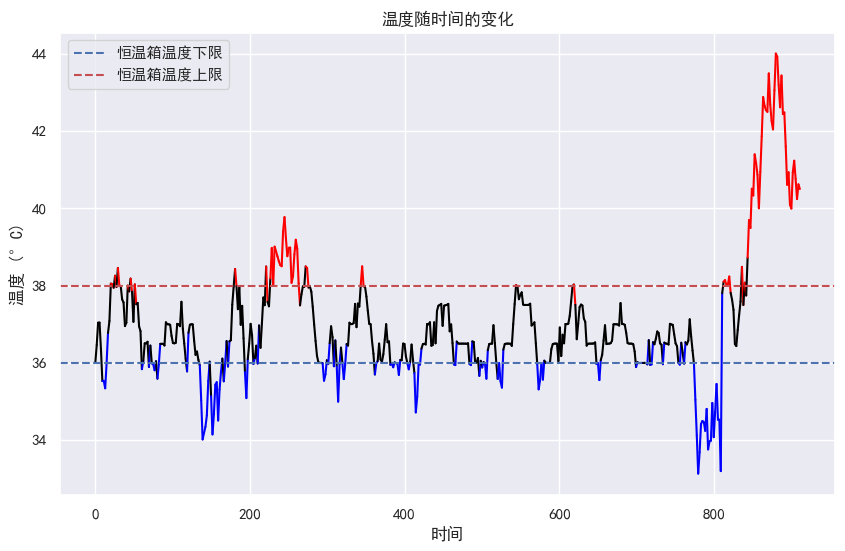

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np

# 加载数据
data = pd.read_csv('temperature_data.csv', header=None, names=['温度'])
data['时间'] = data.index

# 使用插值来生成平滑曲线
x = data['时间']
y = data['温度']
f = interp1d(x, y, kind='cubic')  # 三次样条插值
x_smooth = np.linspace(x.min(), x.max(), 500)  # 生成更多的点来绘制平滑曲线
y_smooth = f(x_smooth)

# 设置绘图样式
sns.set_theme(style="darkgrid")

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 创建平滑曲线图
plt.figure(figsize=(10, 6))

# 定义上下限
lower_limit = 36
upper_limit = 38

# 按上下限切分曲线并分别绘制不同颜色的部分
for i in range(len(x_smooth) - 1):
    if y_smooth[i] < lower_limit:
        plt.plot(x_smooth[i:i + 2], y_smooth[i:i + 2], color="blue")
    elif y_smooth[i] > upper_limit:
        plt.plot(x_smooth[i:i + 2], y_smooth[i:i + 2], color="red")
    else:
        plt.plot(x_smooth[i:i + 2], y_smooth[i:i + 2], color="black")

# 添加上下限的虚线
plt.axhline(y=lower_limit, color='b', linestyle='--', label="恒温箱温度下限")
plt.axhline(y=upper_limit, color='r', linestyle='--', label="恒温箱温度上限")

# 添加标题和标签（中文）
plt.title("温度随时间的变化")
plt.xlabel("时间")
plt.ylabel("温度 (°C)")

# 显示图例
plt.legend()
plt.savefig("temperature_variation.pdf", format='pdf')
plt.show()